<a href="https://colab.research.google.com/github/HuyKhoi-code/CS114.K21/blob/master/predict_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lấy dữ liệu bằng pd.read_csv , sử dụng sep để phân biệt cột

In [1]:
import pandas as pd
import numpy as np 
data = pd.read_csv('http://cs.uit.edu.vn/data2.txt', sep = ',' , names=['input size','time'] )
print(data.shape)
data.head()

(71115, 2)


,input size,time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


tạo thêm features từ 1 feature để tăng độ chính xác khi đánh giá 

In [2]:
data["size^2"] = data['input size'] * data['input size']
data["size*log(size)"] = data['input size'] * np.log10(data['input size'])
columns_title = ['input size' , 'size^2' , 'size*log(size)' , 'time']
data = data.reindex(columns = columns_title)
data.head()

,input size,size^2,size*log(size),time
0,6083695,37011344853025,4.127281e+07,0.521842
1,1954367,3819550370689,1.229493e+07,0.152648
2,3734185,13944137614225,2.454180e+07,0.298548
3,5839301,34097436168601,3.951082e+07,0.460480
4,6343427,40239066104329,4.315005e+07,0.527977


In [0]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

đồ thị bảng dữ liệu 

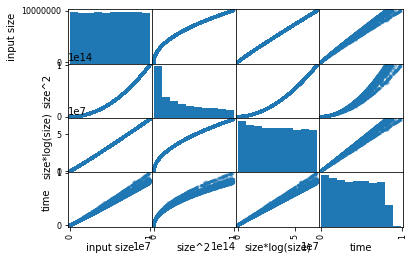

In [4]:
scatter_matrix(data)
pyplot.show()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
phân tách bảng để lấy các features cần cho dự đoán

In [6]:
X = data.iloc[:,0:3]
y = data.iloc[:,3]
print (X.shape , y.shape)

(71115, 3) (71115,)


phân chia dữ liệu train và valid với tỉ lệ 8/2

In [7]:
#print (X.head , y.head)
X_train , X_valid , y_train , y_valid = train_test_split(X , y , test_size = 0.20 , random_state=1)
"""X_train = X_train.values.reshape(-1,1)
X_valid = X_valid.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_valid = y_valid.values.reshape(-1,1)"""

'X_train = X_train.values.reshape(-1,1)\nX_valid = X_valid.values.reshape(-1,1)\ny_train = y_train.values.reshape(-1,1)\ny_valid = y_valid.values.reshape(-1,1)'

Khảo sát mô hình với 3 thuật toán hồi quy đơn giản nhất 

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

đánh giả, tìm ra mô hình tốt nhất bằng cách sử dụng sai số tuyệt đối: mean absolute error

In [9]:
models = []
models.append(('DT' , DecisionTreeRegressor(max_depth = 10 , random_state = 1)))
models.append(('RF' , RandomForestRegressor(n_estimators= 25 , random_state = 1)))
models.append(('LR' , LinearRegression()))
result = []
names = []
for name , model in models:
  model.fit(X_train , y_train)
  val_pred = model.predict(X_valid)
  Test_result = mean_absolute_error(val_pred , y_valid)
  print (name , Test_result)

DT 0.007182720852292817
RF 0.00849929349745915
LR 0.006896127387182563


Linear regression is the best model

Predict new data

In [15]:
LR_model = LinearRegression()
LR_model.fit(X_train , y_train)
val_pred_1 = LR_model.predict(X_valid)
print (val_pred_1[:3])
print (mean_absolute_error(val_pred_1 , y_valid))

[0.3535208  0.74490516 0.78588411]
0.006896127387182563


In [16]:
new_data = {'input size':[2055486] ,
            'size^2':[2055486*561616],
            'size*log(size)': [2055486*np.log10(2055486)]}
data_convert=pd.DataFrame.from_dict(new_data) 
print (LR_model.predict(data_convert))

[0.15662721]


test độ chính xác của mô hình bằng cách so sánh với giá trị thực

In [19]:
new_data_2 = {'input size':[5839301] ,
            'size^2':[5839301*5839301],
            'size*log(size)': [5839301*np.log10(5839301)]}
data_convert_2=pd.DataFrame.from_dict(new_data_2) 
print (LR_model.predict(data_convert_2))
# real time = 0.460480

[0.47407958]
